In [321]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
import scipy.stats as stats
from sklearn.metrics import f1_score
 
data = loadmat('ex8data1.mat')  
X = data['X']   

X.shape

(307, 2)

Text(0, 0.5, 'latency(ms)')

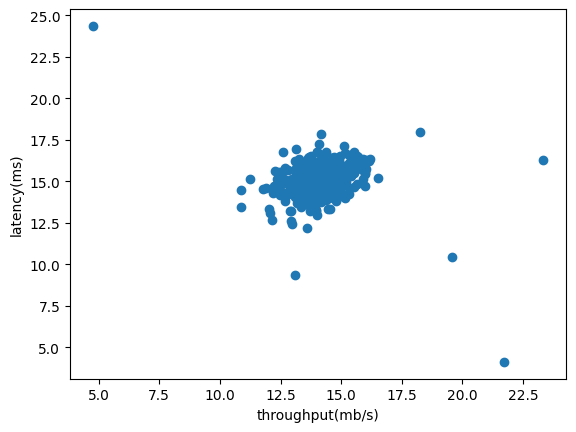

In [322]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel("throughput(mb/s)")
plt.ylabel("latency(ms)")

Text(0.5, 0, 'throughput(mb/s)')

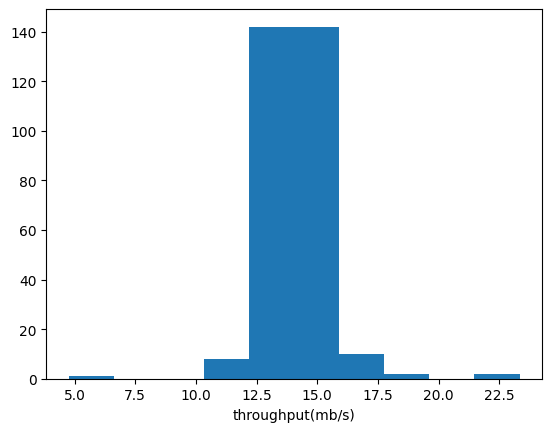

In [323]:
plt.hist(X[:,0])
plt.xlabel("throughput(mb/s)")

Text(0.5, 0, 'latency(ms)')

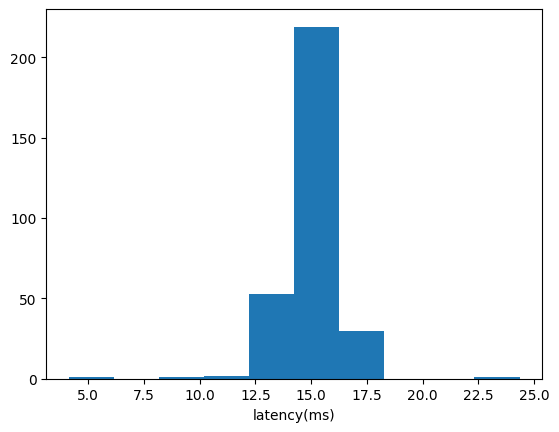

In [324]:
plt.hist(X[:,1])
plt.xlabel("latency(ms)")

In [325]:
def estimate_gaussian(X):  
# TODO: calculate mu and sigma
    mu = np.mean(X,axis=0)

    sigma = np.std(X,axis=0)

    return mu, sigma
 
# TODO: run the function for your dataset

mu, sigma = estimate_gaussian(X)
print(f"Średnia:{mu}")
print(f"Odchylenie std:{sigma}")

Średnia:[14.11222578 14.99771051]
Odchylenie std:[1.35374717 1.3075723 ]


0: 298
1: 9


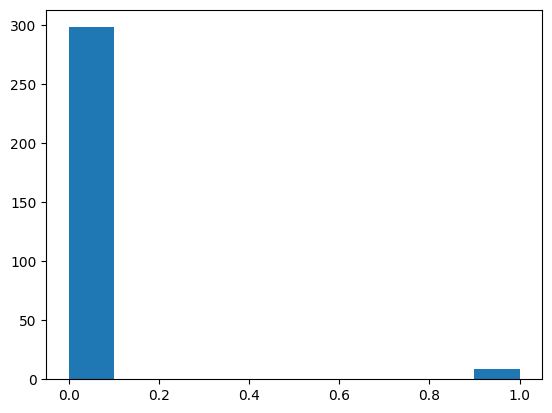

In [326]:
Xval = data['Xval']  
yval = data['yval']

plt.hist(yval)

unikalne_wartosci, ilosci_wystapien = np.unique(yval, return_counts=True)

for value, count in zip(unikalne_wartosci, ilosci_wystapien):
    print(f"{value}: {count}")

Text(0.5, 0, 'throughput(mb/s)')

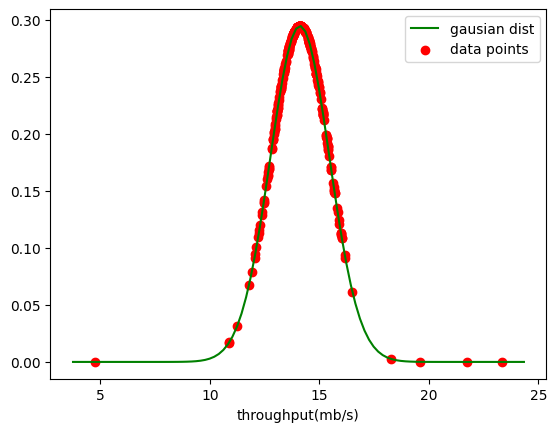

In [327]:
x_vals = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 100)

rozkl = stats.norm.pdf(x_vals,mu[0],sigma[0])

rozkl_pkt = stats.norm.pdf(X[:,0],mu[0],sigma[0])

plt.plot(x_vals,rozkl, color='green',label='gausian dist')

plt.scatter(X[:,0],rozkl_pkt,color='red',label='data points')
plt.legend()
plt.xlabel('throughput(mb/s)')

In [328]:
pval = stats.norm.pdf(X[:,0],mu[0],sigma[0])

0.002949845556474748 0.7142857142857143
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False Fals

Text(0.5, 0, 'throughput(mb/s)')

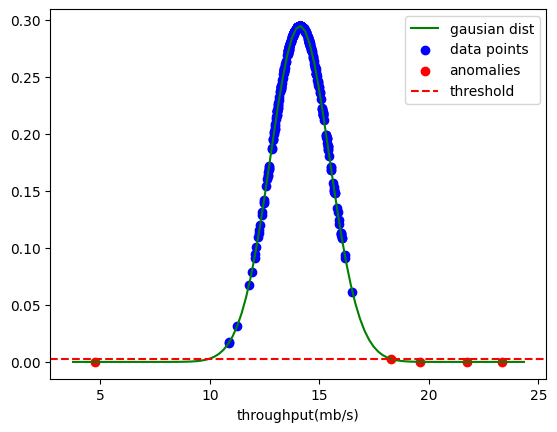

In [329]:
def select_threshold(pval, yval): 
    # TODO: select the best epsilon based on the F1 score
    p_min, p_max = min(pval), max(pval)
    best_f1 = 0
    best_eps = p_min
    epsilons = np.linspace(p_min, p_max, num=1000)

    for eps in epsilons:
        pred = (pval < eps).astype(int)
        current_f1 = f1_score(yval, pred)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_eps = eps



    return best_eps, best_f1

best_eps, best_f1 = select_threshold(pval,yval)

print(best_eps , best_f1)

pred = (pval < best_eps)

print(pred)

thres_x = np.linspace(np.min(X[:,0]),np.max(X[:,0]),num=1000)

plt.plot(x_vals,rozkl, color='green',label='gausian dist')

plt.scatter(X[~pred,0],rozkl_pkt[~pred],color='blue',label='data points')
plt.scatter(X[pred,0],rozkl_pkt[pred],color='red',label='anomalies')
plt.axhline(y=best_eps, color='red', linestyle='--', label='threshold')
plt.legend()
plt.xlabel('throughput(mb/s)')


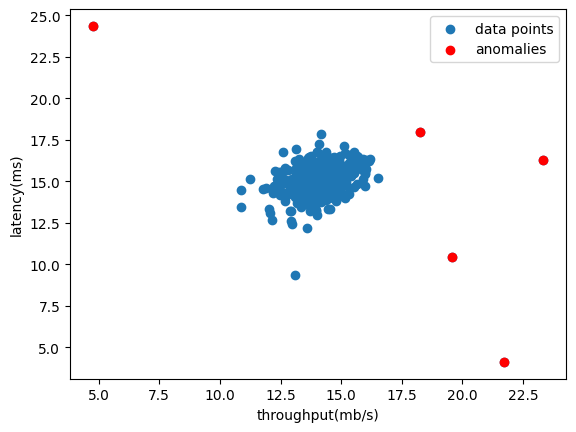

In [330]:
plt.scatter(X[:,0],X[:,1],label='data points')
plt.scatter(X[pred,0],X[pred,1],color='red',label='anomalies')
plt.xlabel("throughput(mb/s)")
plt.ylabel("latency(ms)")
plt.legend()